# LDL decomposition


A closely related variant of the [Cholesky factorization](https://hatefdastour.github.io/notes/Numerical_Analysis/NLA_Cholesky_factorization.html) is the LDL decomposition. In this decomposition, a (real) symmetric positive definite matrix $A$ is decomposed as follows

$$ A =LDL^{*},$$

where $L$ is a lower triangular matrix, and $D$ is a diagonal matrix.


Furthermore, We have,

\begin{align*}
\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots &   & \vdots \\ a_{n1} & a_{n2} & \dots & a_{nn} \end{bmatrix}=
\begin{bmatrix}1 & 0 & \dots & 0 \\ l_{21} & 1 & \dots & 0 \\
\vdots & \vdots &   & \vdots \\ l_{n1} & l_{n2} & \dots & 1 \end{bmatrix}
\begin{bmatrix}d_{11} & 0 & \dots & 0 \\ 0 & d_{22} & \dots & 0 \\
\vdots & \vdots &   & \vdots \\ 0 & 0 & \dots & d_{nn} \end{bmatrix}.
\end{align*}
Solving this system, $l_{ij}$ and $d_{ii}$ can be identified as follows

\begin{align*}
d_{ii} &= a_{ii} - \sum_{k=1}^{i-1} l_{ij}^{2}d_{jj},\\
l_{ii} &= \frac{1}{d_{ii}}\left( a_{ij} - \sum_{k=1}^{i-1} l_{ik} l_{jk} d_{kk}\right),\\
\end{align*}
See [1] for the full derivation of this algorithm. Furthermore, we can prepare a Python code using the above algorithm.

In [1]:
import numpy as np
import pandas as pd

def myLDL(A):
    '''
    Assuming that the matrix A is symmetric and positive definite,
    this function computes a unit lower triangular matrix L, and
    a diagonal matrix D, such that A = LDL^t
    Input: A the nxn matrix to be factorized
    n the number of rows and columns A has
    Output: L an nxn unit lower triangular matrix
    D an nxn diagonal matrix
    '''
    # create an nxn matrix U that holds L below its main diagonal
    # and D on its main diagonal
    n = A.shape[0]
    U = np.zeros([n,n], dtype = float)
    # define the first diagonal entry of D
    U[0, 0] = A[0, 0]
    # define the first column of L
    U[1:, 0] = A[1:, 0]/U[0, 0]
    for j in range(1, n):
        # define the jth diagonal entry of D
        U[j, j] = A[j, j]
        for k in range(0, j):
            U[j, j] = U[j, j] - U[k, k]*U[j, k]*U[j, k]
        # define the jth column of L
        for i in range(j+1, n):
            U[i, j] = A[i, j]
            for k in range(0, j):
                U[i, j] = U[i, j]- U[k, k]*U[i, k]*U[j, k]
            U[i, j] = U[i, j]/U[j, j]
    # Extract L and D from U
    L = np.tril(U,-1) + np.eye(n, dtype=float)
    D = np.diag(np.diag(U))
    return L, D

<font color='Blue'><b>Example</b></font>: Apply $LU$ decomposition on the following matrix.

$$A = \left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]$$

We have,

In [2]:
from IPython.display import display, Latex
from sympy import init_session, init_printing, Matrix

A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
L, D = myLDL(A)
display(Latex(r'L ='), Matrix(np.round(L, 2)))
display(Latex(r'D ='), Matrix(np.round(D, 2)))
display(Latex(r'LD L^T ='), Matrix(np.round(np.matmul(L,np.matmul(D,L.T)), 2)))

<IPython.core.display.Latex object>

Matrix([
[  1.0,     0,    0,   0],
[ 0.43,   1.0,    0,   0],
[-0.14,  0.21,  1.0,   0],
[ 0.29, -0.72, 0.09, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[7.0,    0,    0,    0],
[  0, 6.71,    0,    0],
[  0,    0, 3.55,    0],
[  0,    0,    0, 1.89]])

<IPython.core.display.Latex object>

Matrix([
[ 7.0,  3.0, -1.0,  2.0],
[ 3.0,  8.0,  1.0, -4.0],
[-1.0,  1.0,  4.0, -1.0],
[ 2.0, -4.0, -1.0,  6.0]])

In [3]:
# This part is used for producing tables and figures
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

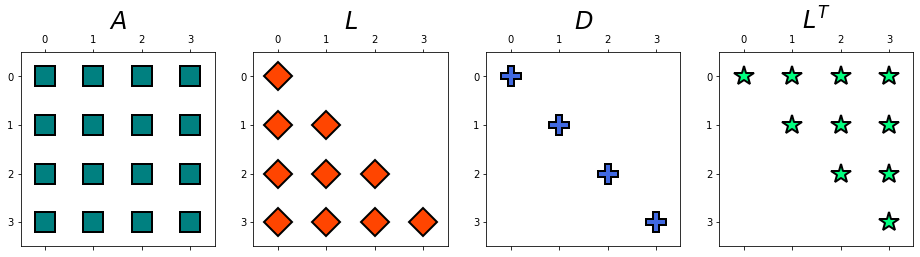

In [4]:
hd.matrix_decomp_fig(mats = [A, L, D, L.T], labels = ['$A$', '$L$', '$D$','$L^T$'], nrows=1, ncols=4, figsize=(16, 4))

Note that we could get a similar results using function, [```scipy.linalg.ldl```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.ldl.html).

In [5]:
import scipy.linalg as linalg
L, D, P = linalg.ldl(A)
display(Latex(r'L ='), Matrix(np.round(L, 2)))
display(Latex(r'D ='), Matrix(np.round(D, 2)))

<IPython.core.display.Latex object>

Matrix([
[  1.0,     0,    0,   0],
[ 0.43,   1.0,    0,   0],
[-0.14,  0.21,  1.0,   0],
[ 0.29, -0.72, 0.09, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[7.0,    0,    0,    0],
[  0, 6.71,    0,    0],
[  0,    0, 3.55,    0],
[  0,    0,    0, 1.89]])

### Solving Linear systems using LDL decomposition

We can solve the linear system $Ax=b$ for $x$ using LDL decomposition. To demonstrate this, we use the following example,

Let
$$A=\left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]
\quad \text{and}\quad
b=\left[\begin{array}{c} 7\\ 1\\ 11\\ 15 \end{array}\right].$$
Then, this linear system can be also expressed as
$$Ax=(LDL^T)x=L(D(L^Tx))=b,$$ 	
we have,

In [6]:
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
b = np.array([[7],[1],[11],[15]])
L, D, P = linalg.ldl(A)
display(Latex(r'L ='), Matrix(np.round(L, 2)))
display(Latex(r'D ='), Matrix(np.round(D, 2)))

<IPython.core.display.Latex object>

Matrix([
[  1.0,     0,    0,   0],
[ 0.43,   1.0,    0,   0],
[-0.14,  0.21,  1.0,   0],
[ 0.29, -0.72, 0.09, 1.0]])

<IPython.core.display.Latex object>

Matrix([
[7.0,    0,    0,    0],
[  0, 6.71,    0,    0],
[  0,    0, 3.55,    0],
[  0,    0,    0, 1.89]])

Now we can solve the following linear systems instead
$$\begin{cases}
Lz = b,\\
Dy = z,\\
B^Tx=y.
\end{cases}$$

In [7]:
# solving Lz=b for z
z = np.linalg.solve(L, b)
display(Latex(r'z ='), Matrix(np.round(z, 2)))

<IPython.core.display.Latex object>

Matrix([
[  7.0],
[ -2.0],
[12.43],
[10.44]])

In [8]:
# solving Lz=b for z
y = np.linalg.solve(D, z)
display(Latex(r'y ='), Matrix(np.round(y, 2)))

<IPython.core.display.Latex object>

Matrix([
[ 1.0],
[-0.3],
[ 3.5],
[5.53]])

In [9]:
# solving Ux=y for x
x = np.linalg.solve(L.T, y)
display(Latex(r'x ='), Matrix(np.round(x, 2)))

<IPython.core.display.Latex object>

Matrix([
[-1.47],
[ 3.07],
[  3.0],
[ 5.53]])

Let's now solve the linear system directly and compare the results.

In [10]:
x1 = np.linalg.solve(A, b)
display(Latex(r'x ='), Matrix(np.round(x1, 2)))

<IPython.core.display.Latex object>

Matrix([
[-1.47],
[ 3.07],
[  3.0],
[ 5.53]])

***
**References:**
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
***